# Crear el dataset con la hipotéca de los clientes y generar los resultados

## Vamos a importar las bibliotecas que usaremos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)



## Analizar resultados

In [2]:
antes_con_modelo = pd.read_csv('resultados_antes_modelo.csv')
despues_con_modelo = pd.read_csv('resultados_despues_modelo.csv')

antes_con_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   primera_fecha      1000 non-null   object 
 2   ult_fecha          1000 non-null   object 
 3   tiempo_serv_trab   1000 non-null   int64  
 4   fecha_inidi        1000 non-null   object 
 5   ent_pago_des       1000 non-null   object 
 6   neto_pagar         1000 non-null   float64
 7   ultimo_sueldo      1000 non-null   float64
 8   ahorros_estimados  1000 non-null   float64
 9   id_estado          1000 non-null   int64  
 10  estado             1000 non-null   object 
 11  q25                1000 non-null   float64
 12  q50                1000 non-null   float64
 13  q75                1000 non-null   float64
 14  fijo_cat_q25       1000 non-null   float64
 15  fijo_mensual_q25   1000 non-null   float64
 16  fijo_ingreso_q25   1000 n

In [3]:
despues_con_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   primera_fecha      1000 non-null   object 
 2   ult_fecha          1000 non-null   object 
 3   tiempo_serv_trab   1000 non-null   int64  
 4   fecha_inidi        1000 non-null   object 
 5   ent_pago_des       1000 non-null   object 
 6   neto_pagar         1000 non-null   float64
 7   ultimo_sueldo      1000 non-null   float64
 8   ahorros_estimados  1000 non-null   float64
 9   id_estado          1000 non-null   int64  
 10  estado             1000 non-null   object 
 11  q25                1000 non-null   float64
 12  q50                1000 non-null   float64
 13  q75                1000 non-null   float64
 14  fijo_cat_q25       1000 non-null   float64
 15  fijo_mensual_q25   1000 non-null   float64
 16  fijo_ingreso_q25   1000 n

In [4]:
antes_con_modelo.head(5)

,id,primera_fecha,ult_fecha,tiempo_serv_trab,fecha_inidi,ent_pago_des,neto_pagar,ultimo_sueldo,ahorros_estimados,id_estado,estado,q25,q50,q75,fijo_cat_q25,fijo_mensual_q25,fijo_ingreso_q25,fijo_cat_q50,fijo_mensual_q50,fijo_ingreso_q50,fijo_cat_q75,fijo_mensual_q75,fijo_ingreso_q75
0,136632919,1980-09-01,2009-12-31,290904,2010-01-01,TABASCO,"28,076.63","28,053.00","1,346,544.00",7,TABASCO,"1,593,500.00","2,500,000.00","4,278,750.00",14.37,"18,071.82","48,191.51",14.25,"28,190.18","75,173.82",14.16,"48,044.62","128,118.99"
1,137467426,1991-02-01,2020-12-31,290601,2021-01-01,JALISCO,"8,179.82","9,619.80","461,750.40",14,JALISCO,"2,690,000.00","3,875,000.00","7,922,500.00",14.24,"30,310.97","80,829.24",14.16,"45,083.77","120,223.38",14.07,"98,115.62","261,641.65"
2,136658471,1973-11-01,2003-09-15,291015,2003-09-16,PONIENTE DE LA CDMX,"13,853.10","13,729.20","659,001.60",9,PONIENTE DE LA CDMX,"3,867,500.00","6,498,250.00","11,625,000.00",14.18,"43,454.24","115,877.98",14.10,"76,902.98","205,074.62",14.05,"144,075.57","384,201.51"
3,136983226,1975-04-16,2004-11-30,290616,2004-12-01,TAMAULIPAS,"9,961.65","12,966.60","622,396.80",10,TAMAULIPAS,"1,830,000.00","3,325,000.00","7,050,000.00",14.33,"20,711.63","55,231.02",14.20,"37,398.85","99,730.26",14.09,"84,605.72","225,615.26"
4,137083528,1974-10-01,2009-12-15,350820,2009-12-16,MICHOACAN,"13,117.28","12,988.20","623,433.60",14,MICHOACAN,"2,075,000.00","4,000,000.00","17,100,593.95",14.29,"23,446.33","62,523.54",14.17,"44,933.21","119,821.89",14.03,"216,278.93","576,743.82"


In [5]:
def puede_pagar_hipoteca(row, q='q25'):
    # Datos
    prop_price = row[q]
    sueldo = row['ultimo_sueldo']
    ahorro = row['ahorros_estimados']
    mensualidad = row[f'fijo_mensual_{q}']
    cat_anual = row[f'fijo_cat_{q}'] / 100  # Lo expresamos en tasa
    mensualidades = 120  # 10 años

    # Aportación inicial: máximo 15%
    max_aportacion = prop_price * 0.15
    ahorro_aplicado = min(ahorro, max_aportacion)

    # Excedente a invertir
    excedente = ahorro - ahorro_aplicado if ahorro > ahorro_aplicado else 0
    fondo = excedente
    tasa_mensual = (1 + cat_anual)**(1/12) - 1

    for _ in range(mensualidades):
        diferencia = mensualidad - sueldo
        if diferencia <= 0:
            # No es necesario usar el fondo
            fondo *= (1 + tasa_mensual)
        else:
            # Se necesita cubrir el faltante
            fondo *= (1 + tasa_mensual)
            fondo -= diferencia
            if fondo < 0:
                return False
    return True


In [6]:

for q in ['q25', 'q50', 'q75']:
    antes_con_modelo[f'{q}_posible'] = antes_con_modelo.apply(puede_pagar_hipoteca, axis=1, q=q)
antes_con_modelo['q25_posible'].value_counts()

q25_posible
True     619
False    381
Name: count, dtype: int64

In [7]:
for q in ['q25', 'q50', 'q75']:
    despues_con_modelo[f'{q}_posible'] = despues_con_modelo.apply(puede_pagar_hipoteca, axis=1, q=q)
despues_con_modelo['q25_posible'].value_counts()

q25_posible
False    522
True     478
Name: count, dtype: int64

In [8]:
antes_con_modelo['q75_posible'].value_counts()


q75_posible
False    956
True      44
Name: count, dtype: int64

In [9]:
despues_con_modelo['q75_posible'].value_counts()

q75_posible
False    987
True      13
Name: count, dtype: int64

In [10]:
antes_con_modelo[antes_con_modelo['q75_posible'] == True]['estado'].value_counts()

estado
SAN LUIS POTOSI        13
HIDALGO                11
ZACATECAS               9
DURANGO                 6
COLIMA                  3
TABASCO                 1
EL ESTADO DE MEXICO     1
Name: count, dtype: int64

In [11]:
despues_con_modelo[despues_con_modelo['q75_posible'] == True]['estado'].value_counts()

estado
HIDALGO      7
DURANGO      3
ZACATECAS    2
TABASCO      1
Name: count, dtype: int64

In [12]:
antes_con_modelo[antes_con_modelo['q25_posible'] == True]['estado'].value_counts()

estado
EL ESTADO DE MEXICO    53
VERACRUZ               41
OAXACA                 38
JALISCO                26
SAN LUIS POTOSI        25
CHIAPAS                25
MICHOACAN              24
YUCATAN                24
GUERRERO               23
SUR DE LA CDMX         23
GUANAJUATO             21
HIDALGO                21
MORELOS                20
TAMAULIPAS             20
CHIHUAHUA              19
DURANGO                18
SONORA                 17
AGUASCALIENTES         17
NORTE DE LA CDMX       17
SINALOA                16
ORIENTE DE LA CDMX     16
NUEVO LEON             16
COAHUILA               15
BAJA CALIFORNIA        13
ZACATECAS              11
TLAXCALA               10
QUERETARO              10
TABASCO                 9
NAYARIT                 8
PONIENTE DE LA CDMX     8
PUEBLA                  7
COLIMA                  5
QUINTANA ROO            2
BAJA CALIFORNIA SUR     1
Name: count, dtype: int64

In [13]:
despues_con_modelo[despues_con_modelo['q25_posible'] == True]['estado'].value_counts()

estado
EL ESTADO DE MEXICO    72
VERACRUZ               51
HIDALGO                40
CHIHUAHUA              23
JALISCO                22
DURANGO                18
SINALOA                18
TAMAULIPAS             14
SUR DE LA CDMX         13
BAJA CALIFORNIA        13
MORELOS                13
NUEVO LEON             12
SAN LUIS POTOSI        12
ZACATECAS              12
OAXACA                 12
GUERRERO               11
YUCATAN                10
GUANAJUATO             10
ORIENTE DE LA CDMX     10
MICHOACAN              10
COLIMA                  9
CHIAPAS                 8
QUERETARO               7
NORTE DE LA CDMX        7
SONORA                  7
TABASCO                 7
COAHUILA                7
QUINTANA ROO            6
PONIENTE DE LA CDMX     6
PUEBLA                  6
AGUASCALIENTES          6
NAYARIT                 4
TLAXCALA                2
Name: count, dtype: int64

In [14]:
antes_con_modelo[antes_con_modelo['q75_posible'] == True]['neto_pagar'].mean()

np.float64(29118.16227272727)

In [15]:
despues_con_modelo[despues_con_modelo['q75_posible'] == True]['neto_pagar'].mean()

np.float64(20790.412307692306)

In [16]:
antes_con_modelo['ahorros_estimados'].mean()

np.float64(1091895.4230342594)

In [17]:
despues_con_modelo['ahorros_estimados'].mean()

np.float64(934651.4868094658)

In [18]:
precios = pd.read_csv('Precios_por_estado.csv')

In [19]:
precios.sort_values(by='q75', ascending=False)

,estado,q25,q50,q75
9,CAMPECHE,"4,361,750.00","8,500,000.00","21,017,500.00"
13,MICHOACAN,"2,075,000.00","4,000,000.00","17,100,593.95"
19,BAJA CALIFORNIA SUR,"5,103,511.44","7,953,487.10","15,088,328.14"
27,COAHUILA,"2,777,703.62","5,122,500.00","12,076,010.64"
21,NUEVO LEON,"2,800,000.00","5,690,000.00","12,060,932.50"
24,NAYARIT,"3,487,500.00","5,850,000.00","11,735,000.00"
0,SUR DE LA CDMX,"3,867,500.00","6,498,250.00","11,625,000.00"
15,PONIENTE DE LA CDMX,"3,867,500.00","6,498,250.00","11,625,000.00"
1,ORIENTE DE LA CDMX,"3,867,500.00","6,498,250.00","11,625,000.00"
23,NORTE DE LA CDMX,"3,867,500.00","6,498,250.00","11,625,000.00"


In [20]:
antes_con_modelo[(antes_con_modelo['q75_posible'] == True)].sort_values(by='q75', ascending=False)[['estado', 'q75']].head(10)

,estado,q75
978,EL ESTADO DE MEXICO,"5,487,500.00"
617,TABASCO,"4,278,750.00"
913,COLIMA,"3,912,500.00"
773,COLIMA,"3,912,500.00"
908,COLIMA,"3,912,500.00"
573,SAN LUIS POTOSI,"3,800,000.00"
274,SAN LUIS POTOSI,"3,800,000.00"
732,SAN LUIS POTOSI,"3,800,000.00"
231,SAN LUIS POTOSI,"3,800,000.00"
96,SAN LUIS POTOSI,"3,800,000.00"


In [21]:
despues_con_modelo[(despues_con_modelo['q75_posible'] == True)].sort_values(by='q75', ascending=False)[['estado', 'q75']].head(10)

,estado,q75
947,TABASCO,"4,278,750.00"
563,DURANGO,"3,625,000.00"
946,DURANGO,"3,625,000.00"
290,DURANGO,"3,625,000.00"
500,HIDALGO,"3,600,000.00"
742,HIDALGO,"3,600,000.00"
713,HIDALGO,"3,600,000.00"
502,HIDALGO,"3,600,000.00"
697,HIDALGO,"3,600,000.00"
917,HIDALGO,"3,600,000.00"


In [22]:
antes_con_modelo.head()

,id,primera_fecha,ult_fecha,tiempo_serv_trab,fecha_inidi,ent_pago_des,neto_pagar,ultimo_sueldo,ahorros_estimados,id_estado,estado,q25,q50,q75,fijo_cat_q25,fijo_mensual_q25,fijo_ingreso_q25,fijo_cat_q50,fijo_mensual_q50,fijo_ingreso_q50,fijo_cat_q75,fijo_mensual_q75,fijo_ingreso_q75,q25_posible,q50_posible,q75_posible
0,136632919,1980-09-01,2009-12-31,290904,2010-01-01,TABASCO,"28,076.63","28,053.00","1,346,544.00",7,TABASCO,"1,593,500.00","2,500,000.00","4,278,750.00",14.37,"18,071.82","48,191.51",14.25,"28,190.18","75,173.82",14.16,"48,044.62","128,118.99",True,True,False
1,137467426,1991-02-01,2020-12-31,290601,2021-01-01,JALISCO,"8,179.82","9,619.80","461,750.40",14,JALISCO,"2,690,000.00","3,875,000.00","7,922,500.00",14.24,"30,310.97","80,829.24",14.16,"45,083.77","120,223.38",14.07,"98,115.62","261,641.65",False,False,False
2,136658471,1973-11-01,2003-09-15,291015,2003-09-16,PONIENTE DE LA CDMX,"13,853.10","13,729.20","659,001.60",9,PONIENTE DE LA CDMX,"3,867,500.00","6,498,250.00","11,625,000.00",14.18,"43,454.24","115,877.98",14.10,"76,902.98","205,074.62",14.05,"144,075.57","384,201.51",False,False,False
3,136983226,1975-04-16,2004-11-30,290616,2004-12-01,TAMAULIPAS,"9,961.65","12,966.60","622,396.80",10,TAMAULIPAS,"1,830,000.00","3,325,000.00","7,050,000.00",14.33,"20,711.63","55,231.02",14.20,"37,398.85","99,730.26",14.09,"84,605.72","225,615.26",False,False,False
4,137083528,1974-10-01,2009-12-15,350820,2009-12-16,MICHOACAN,"13,117.28","12,988.20","623,433.60",14,MICHOACAN,"2,075,000.00","4,000,000.00","17,100,593.95",14.29,"23,446.33","62,523.54",14.17,"44,933.21","119,821.89",14.03,"216,278.93","576,743.82",False,False,False


In [23]:
# Convertir booleanos a enteros (True=1, False=0)
antes_corr = antes_con_modelo[['tiempo_serv_trab', 'q25_posible']].copy()
antes_corr['q25_posible'] = antes_corr['q25_posible'].astype(int)

despues_corr = despues_con_modelo[['tiempo_serv_trab', 'q25_posible']].copy()
despues_corr['q25_posible'] = despues_corr['q25_posible'].astype(int)

print("CORRELACIÓN ANTES DEL MODELO:")
print(antes_corr.corr().loc['tiempo_serv_trab', 'q25_posible'])

print("\nCORRELACIÓN DESPUÉS DEL MODELO:")
print(despues_corr.corr().loc['tiempo_serv_trab', 'q25_posible'])

CORRELACIÓN ANTES DEL MODELO:
0.17833090925267664

CORRELACIÓN DESPUÉS DEL MODELO:
-0.031219215643370924


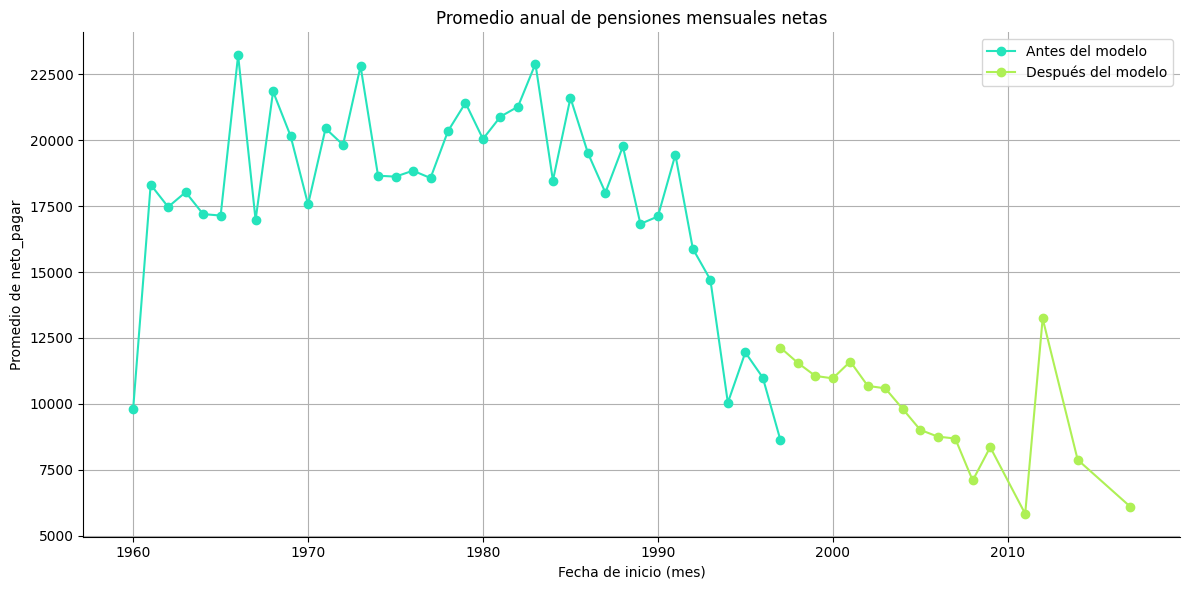

In [24]:


# Asegurarse de que fecha_inidi sea tipo datetime
antes_con_modelo['primera_fecha'] = pd.to_datetime(antes_con_modelo['primera_fecha'])
despues_con_modelo['primera_fecha'] = pd.to_datetime(despues_con_modelo['primera_fecha'])

# Agrupar por mes y calcular el promedio de neto_pagar
antes_mensual = antes_con_modelo.groupby(antes_con_modelo['primera_fecha'].dt.to_period('Y'))['neto_pagar'].mean()
despues_mensual = despues_con_modelo.groupby(despues_con_modelo['primera_fecha'].dt.to_period('Y'))['neto_pagar'].mean()

# Convertir PeriodIndex a datetime para graficar
antes_mensual.index = antes_mensual.index.to_timestamp()
despues_mensual.index = despues_mensual.index.to_timestamp()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(antes_mensual, label='Antes del modelo', marker='o',color='#25e4bc')
plt.plot(despues_mensual, label='Después del modelo', marker='o', color = '#aef055')
plt.xlabel('Fecha de inicio (mes)')
plt.ylabel('Promedio de neto_pagar')
plt.title('Promedio anual de pensiones mensuales netas')
plt.legend()
plt.grid(True)
plt.tight_layout()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [25]:
# Contar cuántos casos son True por estado
conteo_q25_true_por_estado = (
    antes_con_modelo[antes_con_modelo['q25_posible'] == True]
    .groupby('estado')
    .size()
    .reset_index(name='conteo_q25_true')
    .sort_values(by='conteo_q25_true', ascending=False)
)

conteo_q25_true_por_estado['Porcentaje'] = conteo_q25_true_por_estado['conteo_q25_true'] / conteo_q25_true_por_estado['conteo_q25_true'].sum() * 100
conteo_q25_true_por_estado.drop('conteo_q25_true', axis=1, inplace=True)
conteo_q25_true_por_estado.reset_index(drop=True, inplace=True)
conteo_q25_true_por_estado.head()

,estado,Porcentaje
0,EL ESTADO DE MEXICO,8.56
1,VERACRUZ,6.62
2,OAXACA,6.14
3,JALISCO,4.20
4,CHIAPAS,4.04


In [26]:
# Contar cuántos casos son True por estado
conteo_q25_true_por_estado = (
    despues_con_modelo[despues_con_modelo['q25_posible'] == True]
    .groupby('estado')
    .size()
    .reset_index(name='conteo_q25_true')
    .sort_values(by='conteo_q25_true', ascending=False)
)

conteo_q25_true_por_estado['Porcentaje'] = conteo_q25_true_por_estado['conteo_q25_true'] / conteo_q25_true_por_estado['conteo_q25_true'].sum() * 100
conteo_q25_true_por_estado.drop('conteo_q25_true', axis=1, inplace=True)
conteo_q25_true_por_estado.reset_index(drop=True, inplace=True)
conteo_q25_true_por_estado.head()

,estado,Porcentaje
0,EL ESTADO DE MEXICO,15.06
1,VERACRUZ,10.67
2,HIDALGO,8.37
3,CHIHUAHUA,4.81
4,JALISCO,4.60
